In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("SP_II_MN.csv")
x = dataset.iloc[:, [3,7]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[4.2000000e+01 1.0134888e+05]
 [4.1000000e+01 1.1254258e+05]
 [4.2000000e+01 1.1393157e+05]
 ...
 [3.6000000e+01 4.2085580e+04]
 [4.2000000e+01 9.2888520e+04]
 [2.8000000e+01 3.8190780e+04]]


In [4]:
print(y)

[1 0 1 ... 1 1 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
print(x_train)

[[3.9000000e+01 5.8310000e+03]
 [3.2000000e+01 9.5611470e+04]
 [3.4000000e+01 4.2855970e+04]
 ...
 [3.5000000e+01 1.8142987e+05]
 [3.8000000e+01 1.4875016e+05]
 [4.8000000e+01 1.1885526e+05]]


In [7]:
print(x_test)

[[3.5000000e+01 1.9285267e+05]
 [4.0000000e+01 1.2870210e+05]
 [4.2000000e+01 7.5732250e+04]
 ...
 [3.9000000e+01 8.4487620e+04]
 [3.8000000e+01 4.6522680e+04]
 [3.1000000e+01 7.2927680e+04]]


In [8]:
print(y_train)

[1 0 0 ... 0 0 1]


In [9]:
print(y_test)

[0 1 0 ... 0 0 0]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.01526571 -1.64080994]
 [-0.65260917 -0.07927152]
 [-0.46178778 -0.99684012]
 ...
 [-0.36637708  1.4133552 ]
 [-0.08014499  0.84496184]
 [ 0.87396199  0.32500428]]


In [12]:
print(x_test)

[[-0.36637708  1.61203027]
 [ 0.11067641  0.49626891]
 [ 0.3014978  -0.42502785]
 ...
 [ 0.01526571 -0.272747  ]
 [-0.08014499 -0.93306558]
 [-0.74801987 -0.47380732]]


In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1909   82]
 [ 477   32]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


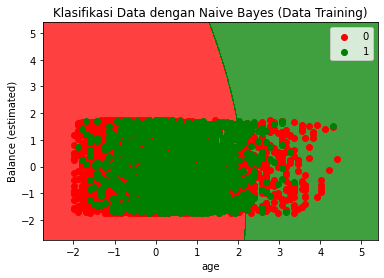

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('age')
plt.ylabel('Balance (estimated)')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


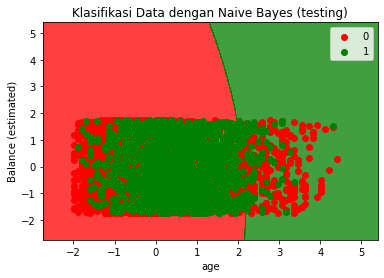

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (testing)')
plt.xlabel('age')
plt.ylabel('Balance (estimated)')
plt.legend()
plt.show()